In [2]:
!pip install kornia
!pip install opencv-python
!pip install matplotlib
!pip install torch
!pip install kornia_rs

You should consider upgrading via the 'F:\Project\pythonProject3\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


You should consider upgrading via the 'F:\Project\pythonProject3\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl (186 kB)
  Using cached fonttools-4.47.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached pillow-10.2.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)


You should consider upgrading via the 'F:\Project\pythonProject3\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'F:\Project\pythonProject3\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'F:\Project\pythonProject3\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import kornia as K
import matplotlib.pyplot as plt
import numpy as np
import torch
from kornia.contrib import FaceDetector, FaceDetectorResult

# select the device and type
device = torch.device("cpu")  # use 'cuda:0'
dtype = torch.float32

In [11]:
# Testing, gatau kenapa ada gabar yang gabisa. Kemungkinan yang bisa gambar di atas 1000px, 1000px dengan format JPG.

import torch

def print_image_info(img_name):
    img_data = torch.tensor(K.io.load_image(img_name, K.io.ImageLoadType.RGB8, device=device)[None, ...], dtype=dtype)
    print(f"Image Information for {img_name}:")
    print("Shape:")
    print(img_data.shape)
    print("Minimum pixel value:")
    print(torch.min(img_data).item())
    print("Maximum pixel value:")
    print(torch.max(img_data).item())
    print("=" * 30)
# Print information about the images
img_paths = ["yayaya.jpg", "crowd.jpg"]

for img_path in img_paths:
    print_image_info(img_path)
    print("\n")




C:\Users\naufa\AppData\Local\Temp\ipykernel_10196\3636321205.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_data = torch.tensor(K.io.load_image(img_name, K.io.ImageLoadType.RGB8, device=device)[None, ...], dtype=dtype)


Image Information for yayaya.jpg:
Shape:
torch.Size([1, 3, 2666, 4000])
Minimum pixel value:
0.0
Maximum pixel value:
255.0


Image Information for crowd.jpg:
Shape:
torch.Size([1, 3, 1173, 1800])
Minimum pixel value:
0.0
Maximum pixel value:
255.0




In [12]:
# load the image (face detector expects a image in rage 0-255 (8 bits))
img = K.io.load_image("yayaya.jpg", K.io.ImageLoadType.RGB8, device=device)[None, ...].to(dtype=dtype)  # BxCxHxW
img_vis = K.tensor_to_image(img.byte())  # to later visualize

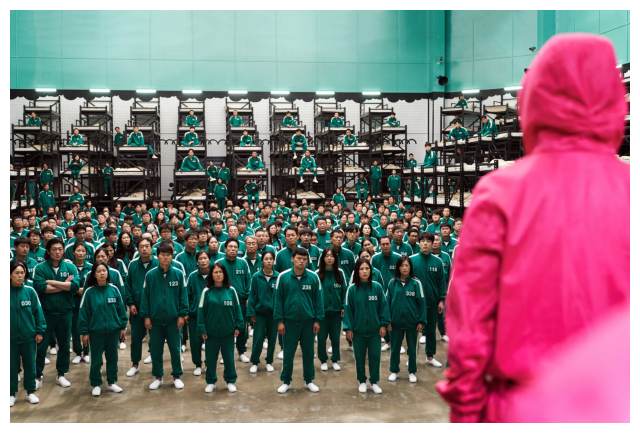

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img_vis)
plt.axis("off")
plt.show()

In [14]:
# create the detector and find the faces !
face_detection = FaceDetector().to(device, dtype)

with torch.no_grad():
    dets = face_detection(img)

# to decode later the detections
dets = [FaceDetectorResult(o) for o in dets]

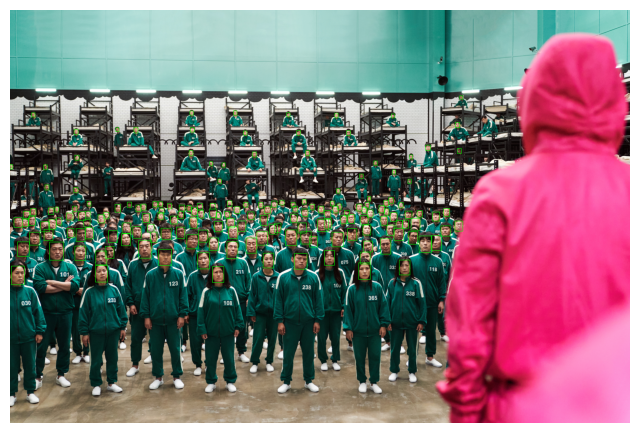

In [15]:
for b in dets:
    # draw face bounding box around each detected face
    top_left = b.top_left.int().tolist()
    bottom_right = b.bottom_right.int().tolist()
    scores = b.score.tolist()

    for score, tp, br in zip(scores, top_left, bottom_right):
        x1, y1 = tp
        x2, y2 = br

        if score < 0.7:
            continue  # skip detection with low score
        img_vis = cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # status = cv2.imwrite('/baru.jpg',img_vis)
        # blur the detected faces
        # apply_blur_face(img, img_vis, x1, y1, x2, y2)

img_vis_rgb = cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB)
cv2.imwrite('baru.jpg',img_vis_rgb)
plt.figure(figsize=(8, 8))
plt.imshow(img_vis)
plt.axis("off")
plt.show()